<a href="https://colab.research.google.com/github/AEE099/hospital-imaging-analysis/blob/main/ML_RAMDOM_FOREST_ESTIMATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datos dataframe: 
     A¤o  Mes                   Nombre Servicio Servicio en 67A  Cantidad  \
0  2015    6  BIOPSIA SONODIRIGIDA DE PROSTATA      Sonograf¡a         1   
1  2015    6  BIOPSIA SONODIRIGIDA DE TIROIDES      Sonograf¡a         2   
2  2015    6              MAMOGRAFIA BILATERAL      Mamograf¡a         7   
3  2015    6                       RX-TORAX AP     Radiograf¡a         1   
4  2015    6                       RX-TORAX PA     Radiograf¡a         3   

   Senasa  Otros  Sin dato  RD  Haiti  Otros.1  Sin dato.1  Masculino  \
0       0      0         0   0      0        0           1          1   
1       1      1         0   0      0        0           2          0   
2       5      1         0   6      0        0           1          0   
3       1      0         0   1      0        0           0          0   
4       2      1         0   2      0        0           1          0   

   Femenino  
0         0  
1         2  
2         7  
3         1  
4         3  
<

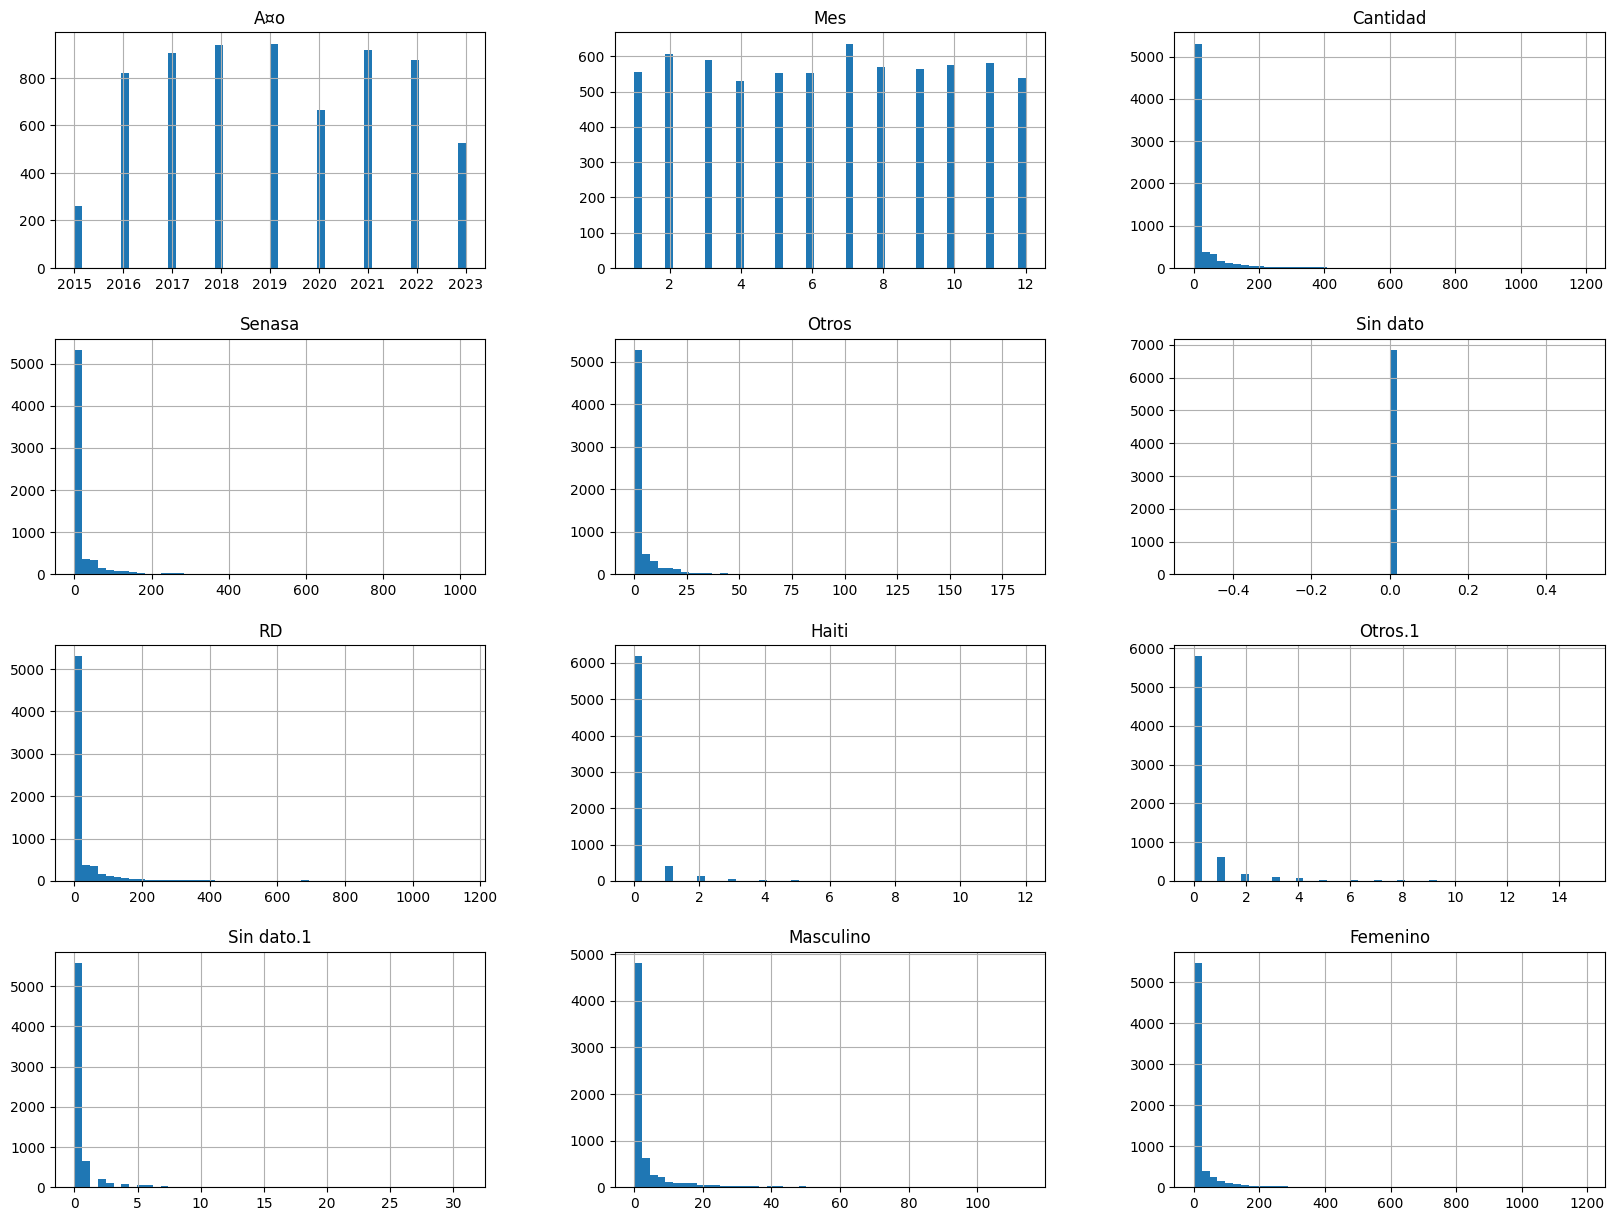

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import streamlit as st


df = pd.read_csv("DA-INCART-IMAGENES-JUN2015-JUN2023.csv", encoding='latin1')

print("Datos dataframe: \n" , df.head())
print ("Dataframe info : \n", df.info())
print ("Dataframe descrive's statistics : \n", df.describe())
print ("Missing values: \n" , df.isnull().sum())
print ("Duplicated values: \n", df.duplicated().sum())

df.info()
df.head()

df.hist(bins=50, figsize=(20, 15))
df.rename(columns={'A¤o': 'Ano'}, inplace=True)
df.rename(columns={"Servicio en 67A" : "Tipo de Servicio"}, inplace=True)
df.rename (columns={"Sin dato" : "Sin datos del seguro"} , inplace=True)
df.rename(columns={"Sin dato.1" : "Sin datos de la nacionalidad"} , inplace=True)
df.rename(columns={"Otros.1" : "Otra nacionalidad"} , inplace=True)
print("Renamed columns: \n", df.columns)

from dataclasses import replace
df ["Tipo de Servicio"] = df["Tipo de Servicio"].str.replace ("¡" ,  "í", regex=False)
df ["Tipo de Servicio"] = df["Tipo de Servicio"].str.replace ("Endoscopías G\xa0strica" ,  "Endoscopías Gastrica", regex=False)
df ["Tipo de Servicio"] = df["Tipo de Servicio"].str.replace ("Resonancia Magn\x82tica" ,  "Resonancia Magnetica", regex=False)
df ["Tipo de Servicio"] = df["Tipo de Servicio"].str.replace ("Otros servicios de im\xa0genes'" ,  "Otros servicios de imagenes", regex=False)

df["Tipo de Servicio"].unique()

df['Ano'].unique()
# Filter the DataFrame for rows where the 'Ano'
filtered_df = df[df["Ano"] == 2023
                 ]

# Display the filtered DataFrame
print(filtered_df)

#For some reason there was a missing value in the histgram for a year between 2015-2019 , but I did not find anything. I filtered all the possibles years
#Nothing was found. I will keep the data as it is.
df.info()
df.describe()
df.drop(["Sin datos del seguro"], axis=1, inplace=True)

# Drop the column "Sin datos del seguro" there was not data in this column.
numeric_df = df.select_dtypes(include=[np.number])
matrix = numeric_df.corr()

In [ ]:
#train the model
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score ,  accuracy_score, classification_report , mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
from pickle import NONE
from math import log2
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df_prueba = df[["Ano" , "Mes" , "Tipo de Servicio", "Cantidad","Nombre Servicio"]].copy()
print(df_prueba.head())

    Ano  Mes Tipo de Servicio  Cantidad                   Nombre Servicio
0  2015    6       Sonografía         1  BIOPSIA SONODIRIGIDA DE PROSTATA
1  2015    6       Sonografía         2  BIOPSIA SONODIRIGIDA DE TIROIDES
2  2015    6       Mamografía         7              MAMOGRAFIA BILATERAL
3  2015    6      Radiografía         1                       RX-TORAX AP
4  2015    6      Radiografía         3                       RX-TORAX PA


In [ ]:
encoder= OneHotEncoder (sparse_output=False)
encoder_Sevicio= OneHotEncoder (sparse_output=False)

servicio_encoded= encoder.fit_transform(df_prueba[["Tipo de Servicio"]])
Nombre_Servicio= encoder_Sevicio.fit_transform(df_prueba[["Nombre Servicio"]])

servicio_encoded_df= pd.DataFrame(servicio_encoded,columns=encoder.get_feature_names_out
 (["Tipo de Servicio"]))
Nombre_Servicio_df= pd.DataFrame(Nombre_Servicio,columns=encoder_Sevicio.get_feature_names_out
 (["Nombre Servicio"]))

X=pd.concat([df_prueba.drop(columns=["Cantidad"]), servicio_encoded_df, Nombre_Servicio_df], axis=1)
X.drop(columns=["Tipo de Servicio"], inplace=True)
X.drop(columns=["Nombre Servicio"], inplace=True)
y = df_prueba['Cantidad']

In [ ]:
#training model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
best_rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)


print("📊 Evaluación del modelo:")
print("R²: (Coeficiente de Determinación)", r2_score(y_test, y_pred))
print("MSE:  (Mean Squared Error - Error Cuadrático Medio)", mean_squared_error(y_test, y_pred))
print("RMSE:  (Root Mean Squared Error - Raíz del Error Cuadrático Medio)", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:(Mean Absolute Error - Error Absoluto Medio)", mean_absolute_error(y_test, y_pred))
print("MAPE: (Mean Absolute Percentage Error - Error Porcentual Absoluto Medio", np.mean(np.abs((y_test - y_pred) / y_test)) * 100)


r2_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
print("🔁 R² promedio en CV:", np.mean(r2_scores))


y_pred_cv = cross_val_predict(best_rf, X_train, y_train, cv=5)

mse = mean_squared_error(y_train, y_pred_cv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_cv)
mape = np.mean(np.abs((y_train - y_pred_cv) / y_train)) * 100

print("📊 Validación cruzada - métricas:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


📊 Evaluación del modelo:
R²: (Coeficiente de Determinación) 0.9028686811648398
MSE:  (Mean Squared Error - Error Cuadrático Medio) 1145.1626441431285
RMSE:  (Root Mean Squared Error - Raíz del Error Cuadrático Medio) 33.84025183332903
MAE:(Mean Absolute Error - Error Absoluto Medio) 16.767220703476077
MAPE: (Mean Absolute Percentage Error - Error Porcentual Absoluto Medio 358.53737613134604
🔁 R² promedio en CV: 0.9113074773449507
📊 Validación cruzada - métricas:
MSE: 1079.4568990524028
RMSE: 32.85508939346236
MAE: 16.090775265642645
MAPE: 394.0354896232318


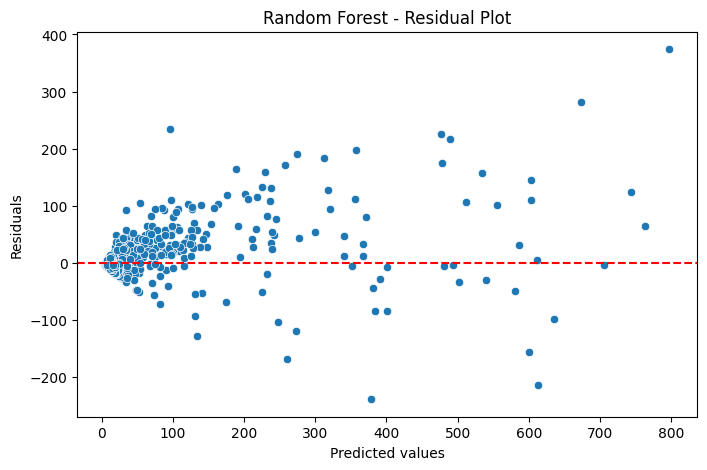

In [ ]:
#Vizualize the resutls (residual plot   )
import seaborn as sns

def plot_residuals(y_true, y_pred, model_name):
    # Flatten y_true and y_pred to ensure they are 1-dimensional
    y_true = y_true.to_numpy()
    y_pred = y_pred.flatten()
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, linestyle='--', color='red')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title(f'{model_name} - Residual Plot')
    plt.show()

plot_residuals(y_test, y_pred, "Random Forest")

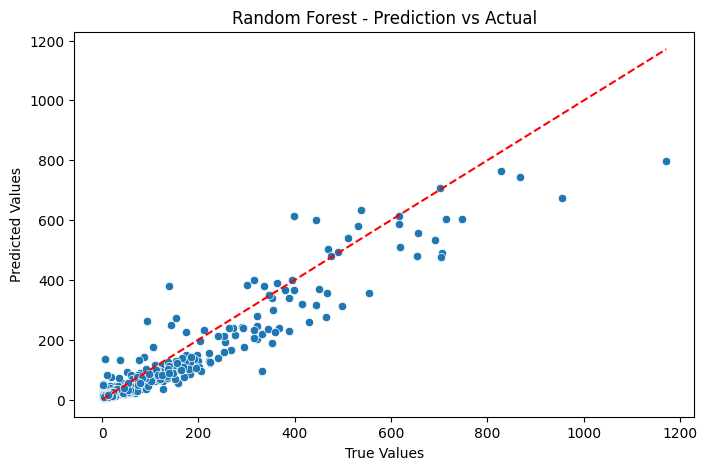

In [ ]:
#Vizualize the data predicted results vs actual results
def plot_prediction(y_true, y_pred, model_name):
    y_true = y_true.to_numpy()
    y_pred = y_pred.flatten()
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_true, y=y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title(f'{model_name} - Prediction vs Actual')
    plt.show()

plot_prediction(y_test, y_pred, "Random Forest")

In [ ]:
#df["Tipo de Servicio"].unique()
df["Nombre Servicio"].unique()

array(['BIOPSIA SONODIRIGIDA DE PROSTATA',
       'BIOPSIA SONODIRIGIDA DE TIROIDES', 'MAMOGRAFIA BILATERAL',
       'RX-TORAX AP', 'RX-TORAX PA', 'SONOGRAFIA ABDOMINAL',
       'SONOGRAFIA DE MAMAS', 'SONOGRAFIA DE TIROIDES',
       'SONOGRAFIA PELVICA', 'SONOGRAFIA TRANSVAGINAL',
       'BIOPSIA DE HUESO ( NO INCLUYE KIT CON AGUJA JAMSHIDI NI INMUNOHISTOQU?',
       'BIOPSIA POR TOMOGRAFIA ',
       'BIOPSIA PULMON DIRIGIDA POR SONOGRAFIA',
       'BIOPSIA SONODIRIGIDA DE CUELLO (GANGLIOS Y TIROIDES Y MASAS)',
       'BIOPSIA SONODIRIGIDA DE MAMAS',
       'BIOPSIA SONODIRIGIDA DE MAMAS CON TRUCUT + AGUJA',
       'BIOPSIA SONODIRIGIDA PARTES BLANDAS (CON TRUCUT)',
       'BIOPSIA TOMODIRIGIDA HEPATICA', 'CITOSCOPIA ',
       'COLPOSCOPIA CON BIOPSIA', 'MAMOGRAFIA UNILATERAL',
       'MARCAJE 6 PLACAS', 'RX-COLUMNA LUMBO-SACRA AP Y LATERAL',
       'RX-FEMUR (MUSLO) INCLUYENDO UNA ARTICULACION AP Y LATERAL',
       'RX-HOMBRO AP', 'RX-MANO (O AMBAS) 2 POSICIONES (AP Y OBLICUA)',
    

In [ ]:
nuevos_datos= pd.DataFrame({
    "Ano" : [2022] ,
    "Mes": [8],
    "Tipo de Servicio": ["Sonografía"],
    "Nombre Servicio": ["SONOGRAFIA ABDOMINAL"]
})

servicio_nuevo_encoded= encoder.transform(nuevos_datos[["Tipo de Servicio"]])

Nombre_Servicio_nuevo_encoded= encoder_Sevicio.transform(nuevos_datos[["Nombre Servicio"]])

servicio_nuevo_df= pd.DataFrame(servicio_nuevo_encoded ,
columns=encoder.get_feature_names_out(["Tipo de Servicio"]))

Nombre_Servicio_df= pd.DataFrame(Nombre_Servicio_nuevo_encoded ,
columns=encoder_Sevicio.get_feature_names_out(["Nombre Servicio"]))


x_nuevo= pd.concat([nuevos_datos [["Ano", "Mes"]].reset_index(drop=True),
                    servicio_nuevo_df.reset_index(drop=True),
                    Nombre_Servicio_df.reset_index(drop=True)], axis=1)




predicciones = best_rf.predict(x_nuevo)

nuevos_datos['Predicción Cantidad'] = predicciones.round(0).astype(int)
print(nuevos_datos)




    Ano  Mes Tipo de Servicio       Nombre Servicio  Predicción Cantidad
0  2022    8       Sonografía  SONOGRAFIA ABDOMINAL                   91
